### Reading images files

In [44]:
import glob
import os
import pathlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

In [45]:
TRAINING_CSV_PATH = '../data/raw/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/*/*.csv'

IMAGE_WIDTH = 30
IMAGE_HEIGHT = IMAGE_WIDTH

glob : module très utile pour parcourir les chemins d'accès

PEP8 guide de convention de code en python  ( check sur google)

In [19]:
os.path.dirname(TRAINING_CSV_PATH)

'../data/raw/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/*'

In [81]:
def build_images_database(path):
    """
    Build a pandas dataframe with all images information
    
    Parameters
    ---------
    path: path pattern to read csv files conatining images information
    
    Returns
    ------
    A pandas Dtaframe with on line per images
    
    """
    df_list = []
    for filename in glob.glob(path):
        df = pd.read_csv(filename, sep=';')
        df['path']= os.path.dirname(filename) +'/' + df['Filename']
        df_list.append(df)
    
    return pd.concat(df_list, ignore_index=True)
    
    
# Option en 1 ou 2 paramètres

# Option en 1 paramètre
#      [('f1': x1, y1, x2, y2), ('f2': x1, y1, x2, y2),... ]

# Option en 2 paramètres
#  [ [f1, f2, ... ], (x1, y1, x2, y2), None, ...]

    
def build_images_list(filename_list, boxes_list=None):
    """Build a list of images as Numpy array
    
    
    Parameters
    ----------
    filename_list: list of images filenames
    boxes_list : optionnal list of boxes for clipping within ilages. Boxes are 4-tuples (x1, y1, x2, y2)
    
    Returns
    -------
    A list of images as numpy array
    """
    
    # If no boxes list is given, generate a fake boxes with None boxes
    # image.resize will take the full size image  if  box == None
    
    if boxes_list is None:
        boxes_list = [None] * len(filename_list)
    
    assert len(filename_list) == len(boxes_list), "filenames and boxes must have same length"
    
    images_list =[]
    
    for (filename, image_box) in zip(filename_list, boxes_list):
        image = Image.open(filename)
        image = image.resize((IMAGE_WIDTH, IMAGE_HEIGHT), box=image_box)
        image = np.array(image)
        images_list.append(image)
        
    return images_list




In [75]:
images_df= build_images_database(TRAINING_CSV_PATH)
images_df.head()

,Filename,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,path
0,00000_00000.ppm,29,30,5,6,24,25,0,../data/raw/GTSRB_Final_Training_Images/GTSRB/...
1,00000_00001.ppm,30,30,5,5,25,25,0,../data/raw/GTSRB_Final_Training_Images/GTSRB/...
2,00000_00002.ppm,30,30,5,5,25,25,0,../data/raw/GTSRB_Final_Training_Images/GTSRB/...
3,00000_00003.ppm,31,31,5,5,26,26,0,../data/raw/GTSRB_Final_Training_Images/GTSRB/...
4,00000_00004.ppm,30,32,5,6,25,26,0,../data/raw/GTSRB_Final_Training_Images/GTSRB/...


In [82]:
images_list = build_images_list(images_df.head(1000)['path'].values,
                                images_df.head(1000).apply(lambda r: (r['Roi.X1'], r['Roi.Y1'], r['Roi.X2'], r['Roi.Y2']),
                                                         axis=1).values)

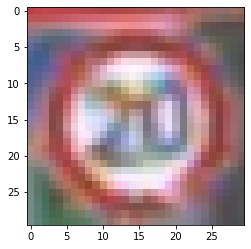

In [80]:
plt.imshow(images_list[0])

In [71]:
images_df['path'][0]

'../data/raw/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images\\00000/00000_00000.ppm'

In [33]:
images_df['ClassId'].nunique() 

43

In [26]:
images_df['Width'].value_counts()

34     1327
35     1323
31     1319
33     1316
30     1304
       ... 
183       1
173       1
162       1
229       1
226       1
Name: Width, Length: 187, dtype: int64

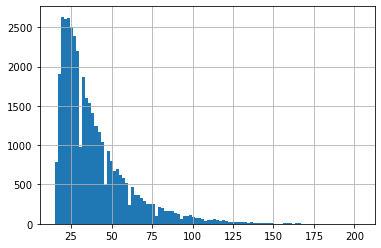

In [36]:
(images_df['Roi.X2'] - images_df['Roi.X1']).hist(bins=100)

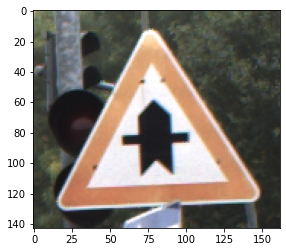

In [72]:
plt.imshow(Image.open(images_df.query('Width == 162')['path'].values[0]))

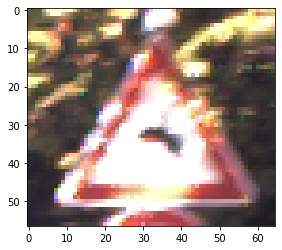

In [83]:
plt.imshow(Image.open(images_df.query('ClassId == 19').iloc[0]['path']))

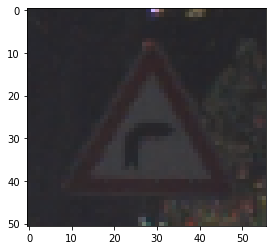

In [86]:
plt.imshow(Image.open(images_df.query('ClassId == 20').iloc[20]['path']))

In [2]:
from PIL import Image

In [3]:
img = Image.open("../data/raw/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/00000/00000_00000.ppm")

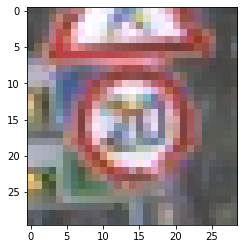

In [4]:
plt.imshow(img)

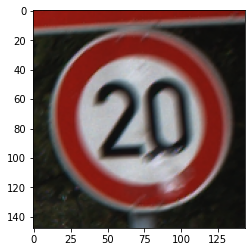

In [5]:
img = Image.open("../data/raw/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/00000/00000_00029.ppm")
plt.imshow(img)